### Capstone 3: Breast Cancer Prediction

*Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.*

*This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.*

**Goal**: Build a classification model that can accurately identify the diagnosis of breast cancer based on the measurements and attributes of a tumor.


*Source: https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset*

**Data Dictionary**

Tumor measurements (independent variables)
* mean_radius: mean of distances from center to points on the perimeter
* mean_texture: standard deviation of gray-scale values
* mean_perimeter: mean size of the core tumor
* mean_area
* mean_smoothness: mean of local variation in radius lengths

Diagnosis (dependent / outcome variable)
* diagnosis: the diagnosis of breast tissues (1 = malignant, 0 = benign)


### Data Wrangling ###

In [49]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#load data into pandas dataframe
df = pd.read_csv('/Users/joyopsvig/github/springboard/3-Capstone/Datasets/breastcancer_data.csv')

In [51]:
#view first few rows of data
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [52]:
#view info to see missing values per column and identify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [53]:
#confirm there no missing values
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [54]:
#check for duplicates
df.duplicated().sum()

0

In [55]:
#view summary statistics
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


array([[<AxesSubplot:title={'center':'mean_radius'}>,
        <AxesSubplot:title={'center':'mean_texture'}>,
        <AxesSubplot:title={'center':'mean_perimeter'}>],
       [<AxesSubplot:title={'center':'mean_area'}>,
        <AxesSubplot:title={'center':'mean_smoothness'}>,
        <AxesSubplot:title={'center':'diagnosis'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

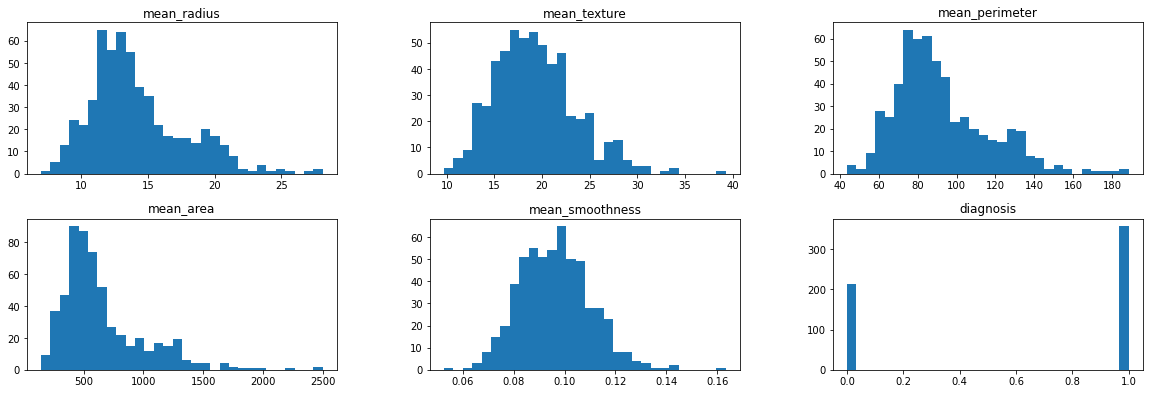

In [56]:
#check distributions for features
df.hist(figsize=(20,10), grid=False, layout=(3, 3), bins = 30)

The data is cleaned and ready for exploratory data analysis.

### Exploratory Data Analysis ###

In [57]:
#view malignant versus benign
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

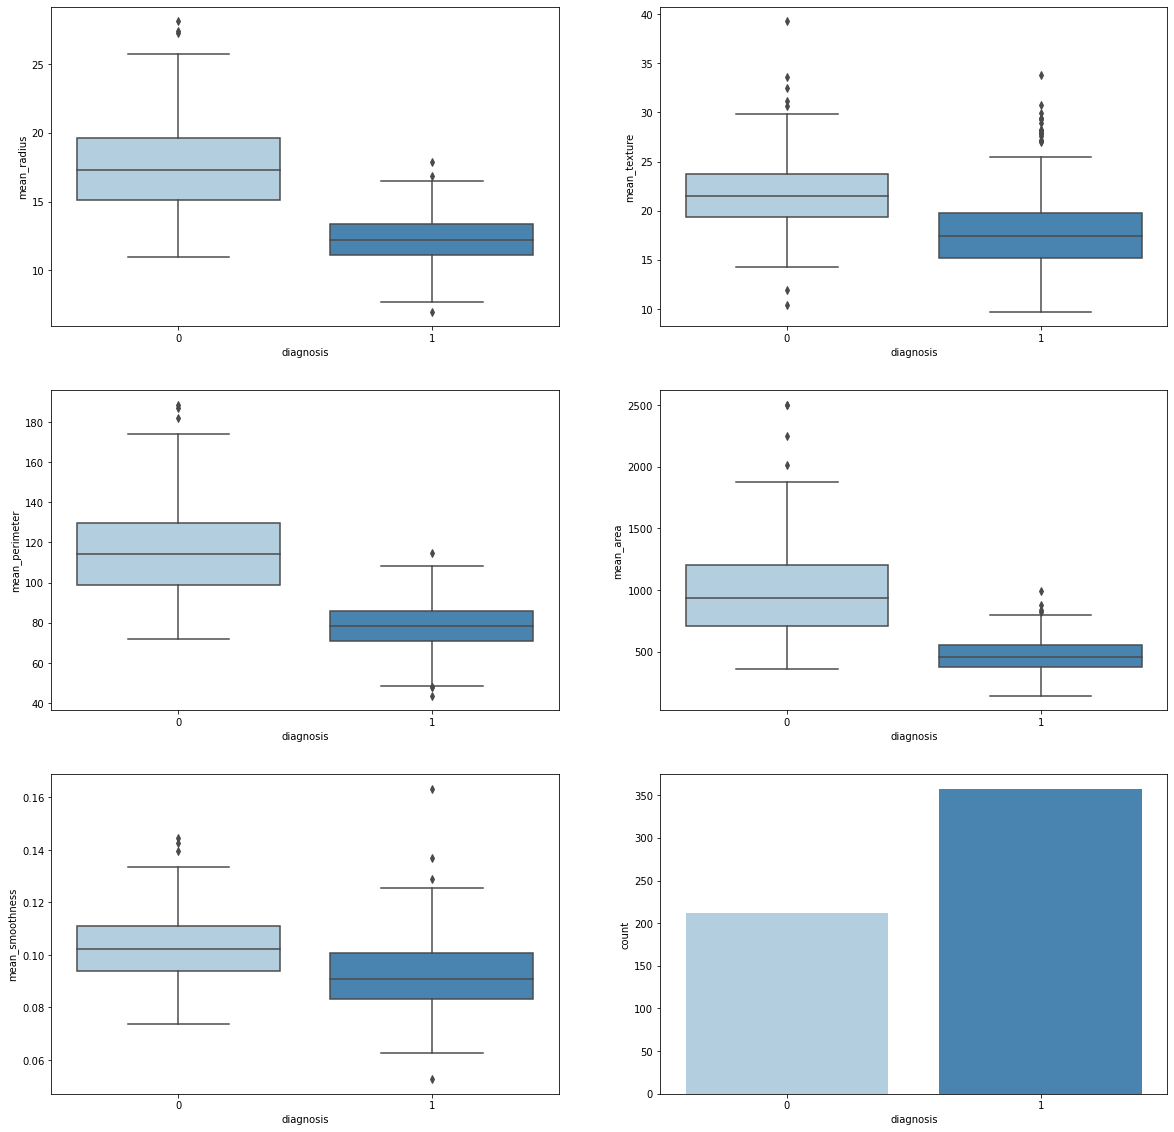

In [58]:
#call boxplots to view diagnosis vs. features
fig_dims = (20, 20)
fig, ax = plt.subplots(3,2, figsize=fig_dims)
sns.boxplot(data=df, x='diagnosis', y='mean_radius', ax=ax[0,0], palette="Blues")
sns.boxplot(data=df, x='diagnosis', y='mean_texture', ax=ax[0,1], palette="Blues")
sns.boxplot(data=df, x='diagnosis', y='mean_perimeter', ax=ax[1,0], palette="Blues")
sns.boxplot(data=df, x='diagnosis', y='mean_area', ax=ax[1,1], palette="Blues")
sns.boxplot(data=df, x='diagnosis', y='mean_smoothness', ax=ax[2,0], palette="Blues")
sns.countplot(data=df, x='diagnosis', ax=ax[2,1], palette="Blues")
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

Reviewing the above boxplots, it appears that benign tumors tend to have higher measurements on average across all features.

In [60]:
#review datapoints that appear to be outliers
df[df['mean_smoothness'] > 0.15]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
504,9.268,12.87,61.49,248.7,0.1634,1


In [61]:
#compare above datapoint to averages, 504 appears to be have extremely high smoothness 
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [62]:
#remove 504 from dataset
df.drop(labels=504, axis=0, inplace=True) 

In [63]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.135847,19.300951,92.022694,655.604225,0.096242,0.626761
std,3.521236,4.296362,24.286633,351.810281,0.013792,0.484091
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.707500,16.177500,75.200000,420.300000,0.086290,0.000000
50%,13.375000,18.855000,86.290000,551.400000,0.095865,1.000000
75%,15.797500,21.802500,104.150000,784.150000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.144700,1.000000


In [64]:
#review datapoints that appear to be outliers
df[df['mean_texture'] > 30]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
219,19.53,32.47,128.00,1223.0,0.08420,0
232,11.22,33.81,70.79,386.8,0.07780,1
239,17.46,39.28,113.40,920.6,0.09812,0
259,15.53,33.56,103.70,744.9,0.10630,0
265,20.73,31.12,135.70,1419.0,0.09469,0
455,13.38,30.72,86.34,557.2,0.09245,1
562,15.22,30.62,103.40,716.9,0.10480,0


Instance 239 is exceptionally high, but it appears there are other measurements with in the 30 measurement range, so I will leave 239 in the dataset.

In [71]:
# add new column for categorical diagnosis for data visualization
df['target'] = df['diagnosis'].map({0:'benign',1:'malignant'})

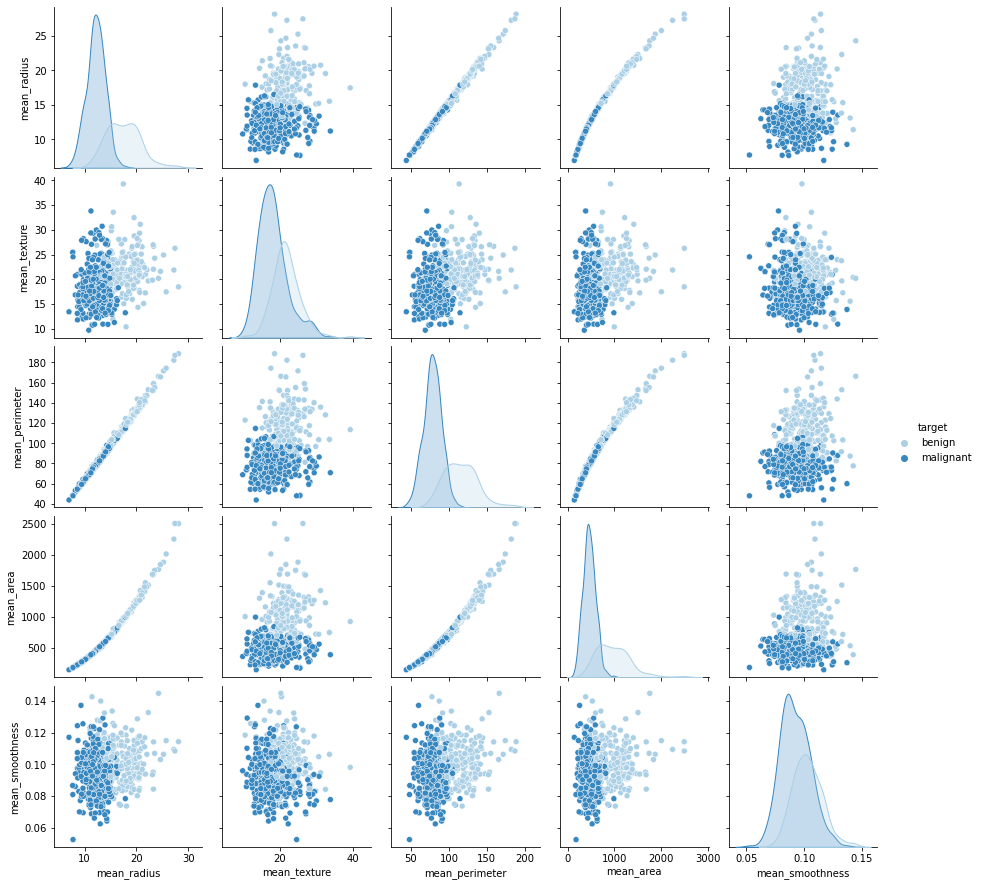

In [72]:
g = sns.pairplot(df.drop('diagnosis', axis = 1), hue="target", palette='Blues')

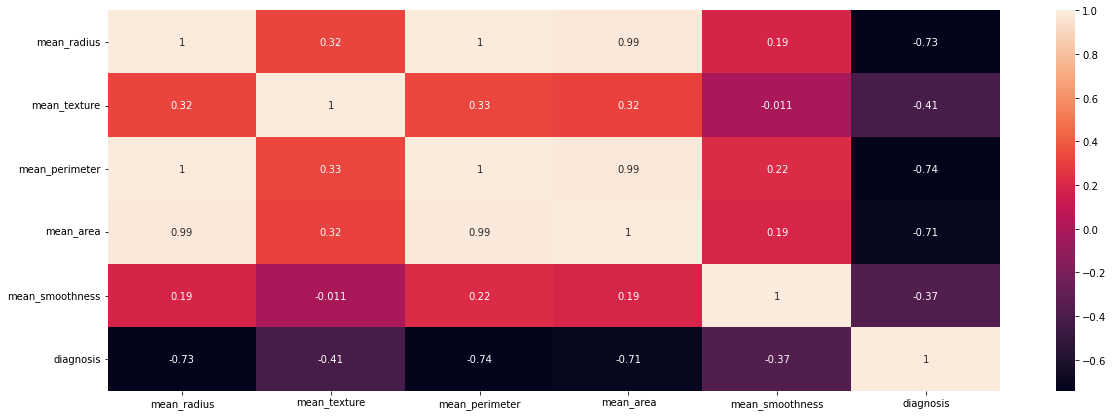

In [65]:
#review feature correlation in a heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True);

Based on the above exploratory data analysis, I predict that tumors with higher measurements compared to the average (mean) measurements of the datasets are more likely to be benign than malignant.

In [66]:
df.to_csv('breastcancerrisk_cleaned.csv', index=False)